In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,
                     "font.family": "Palatino"
                     })
from scipy.stats import norm

# Various Random Walks

## Brownian motion without drift

Brownian motion without drift follows the stochastic differential equation
$$
\mathrm{d}S(t,X(t)) = \sigma \mathrm{d}X(t),
$$
where $\mathrm{d}X(t)$ is a Wiener process, that is 
$$
\mathbb{E}(\mathrm{d}X) = 0,\qquad \mathbb{E}((\mathrm{d}X)^2) = \mathrm{d}t,
$$
$\mathrm{d}X$ is a Markov process and the increments $X(t_{i+1}) - X(t_i)$ are Martingale.\
\
This SDE can be explicitly solved, given the initial condition $S(t = 0) = S_0$
$$
S(t) = S(0) + \sigma(X(t) - X(0)).
$$
Comparing the full realizations of a Brownian motion with just sampling the solution, one needs to be aware of the fact that $X(t) - X(0)$ is a random variable with zero mean but a variance of $t - 0 = t$. So we really need to think of $\mathrm{d}X(t)$ as $X(t_{i+1}) - X(t_i)$ for an increment $t_{i+1} - t_i = \mathrm{d}t$.

Text(0.5, 1.0, 'Brownian motion without drift')

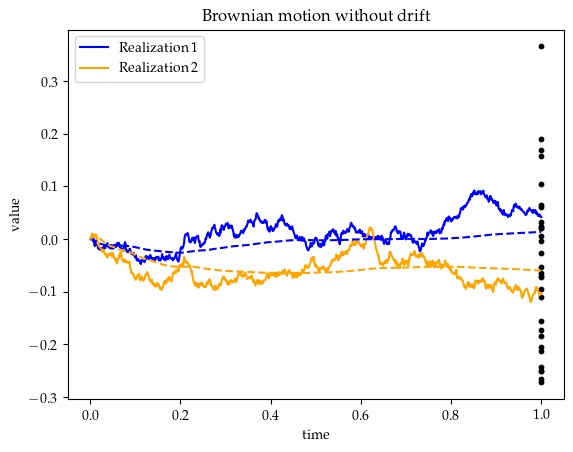

In [33]:
T = 1000 #number of time steps
ts = np.linspace(0, 1, T) #time steps
dt = ts[1] - ts[0] #time step size
sigma = 0.1 #standard deviation
N = 2 #number of realizations

# Realize Brownian motion without drift
B = np.zeros((N, T))
avg = np.zeros((N, T))
q_var = np.zeros((N, T - 1))
for n in range(N):
    B[n, 0] = 0
    avg[n, 0] = 0
    q = 0
    for t in range(1, T):
        B[n, t] = B[n, t-1] + sigma * np.random.normal(0, np.sqrt(dt))
        avg[n, t] = np.mean(B[n, :t+1])
        q += (B[n, t] - B[n, t-1]) ** 2
        q_var[n, t - 1] = q

#Realize the solution
B_sol = sigma * (np.random.normal(0, 1, (30)) - np.random.normal(0, 1, (30)))

plt.plot(ts, B[0, :], label='Realization 1', color='blue')
plt.plot(ts, B[1, :], label='Realization 2', color='orange')
plt.plot(ts, avg[0, :], color='blue', linestyle='--')
plt.plot(ts, avg[1, :], color='orange', linestyle='--')
#plt.plot(ts, var[0, :], color='blue', linestyle=':')
#plt.plot(ts, var[1, :], color='orange', linestyle=':')
plt.scatter(np.ones_like(B_sol), B_sol, s=10, color='black')
plt.legend()
plt.xlabel('time')
plt.ylabel('value')
plt.title('Brownian motion without drift')

Text(0.5, 1.0, 'quadratic variation of Brownian motion without drift')

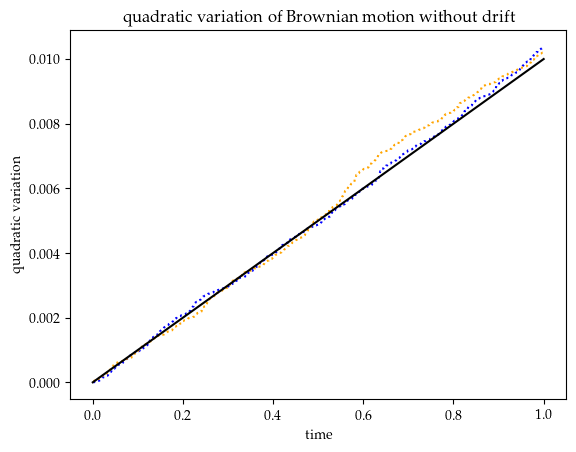

In [71]:
plt.plot(ts[1:], q_var[0, :], color='blue', linestyle=':')
plt.plot(ts[1:], q_var[1, :], color='orange', linestyle=':')
plt.plot(ts, sigma ** 2 * ts, color='black')
plt.xlabel('time')
plt.ylabel('quadratic variation')
plt.title('quadratic variation of Brownian motion without drift')

## Brownian motion with drift

Brownian motion with drift $\mu$ is governed by the following SDE:
$$
\mathrm{d}S(t,X(t)) = \mu\mathrm{d}t+\sigma\mathrm{d}X(t).
$$
Providing initial conditions $S(t=0) = S_0$, this equation can be solved explicitly, yielding
$$
S(t) = S(0) + \mu t + \sigma(X(t) - X(0)).
$$

Text(0.5, 1.0, 'Brownian motion with drift')

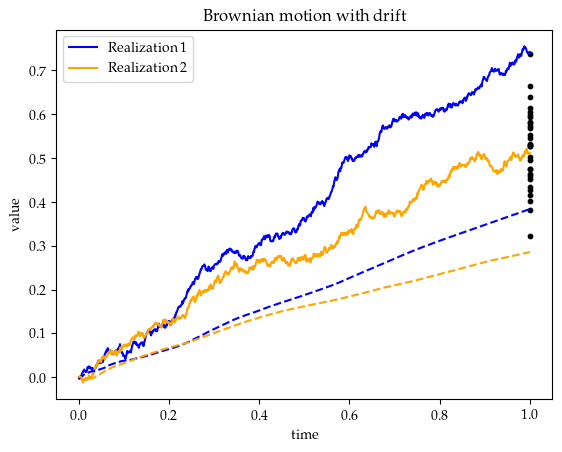

In [35]:
T = 1000 #number of time steps
ts = np.linspace(0, 1, T) #time steps
dt = ts[1] - ts[0] #time step size
sigma = 0.1 #standard deviation
drift = 0.5 #drift
N = 2 #number of realizations

#Realize Brownian motion with drift
B_drift = np.zeros((N, T))
avg = np.zeros((N, T))
for n in range(N):
    B_drift[n, 0] = 0
    avg[n, 0] = 0
    for t in range(1, T):
        B_drift[n, t] = B_drift[n, t-1] + drift * dt + sigma * np.random.normal(0, np.sqrt(dt))
        avg[n, t] = np.mean(B_drift[n, :t+1])

# Realize solution of Brownian motion with drift
B_drift_sol = drift * 1 + sigma * np.random.normal(0, 1, (30))


plt.plot(ts, B_drift[0, :], label='Realization 1', color='blue')
plt.plot(ts, B_drift[1, :], label='Realization 2', color='orange')
plt.plot(ts, avg[0, :], color='blue', linestyle='--')
plt.plot(ts, avg[1, :], color='orange', linestyle='--')
#plt.plot(ts, var[0, :], color='blue', linestyle=':')
#plt.plot(ts, var[1, :], color='orange', linestyle=':')
plt.scatter(np.ones_like(B_drift_sol), B_drift_sol, s=10, color='black')
plt.legend()
plt.xlabel('time')
plt.ylabel('value')
plt.title('Brownian motion with drift')

A comparison between Brownian motion with and without drift:

Text(0.5, 1.0, 'Brownian motion with and without drift')

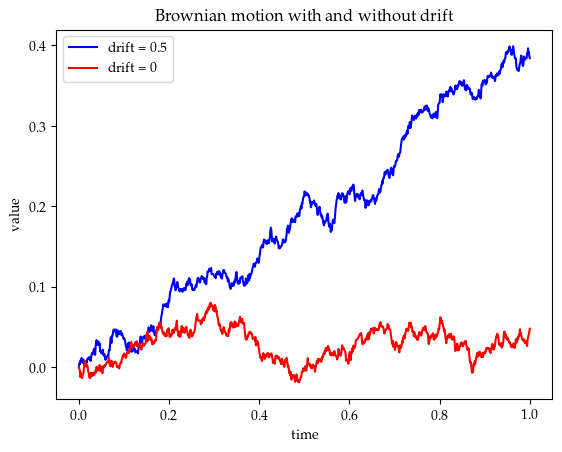

In [86]:
plt.plot(ts, B_drift[1, :], color='blue', label='drift = 0.5')
plt.plot(ts, B[0, :], color='red', label='drift = 0')
plt.legend()
plt.xlabel('time')
plt.ylabel('value')
plt.title('Brownian motion with and without drift')

## Log-normal random walk

The previous random walks are not appropriate to describe the behavior of financial assets like stock prices since they can be negative, and they do not reflect the effect of compound interest. The log-normal random walk gets us closer to that:
$$
\mathrm{d}S(t, X(t)) = \mu S\mathrm{d}t+\sigma S\mathrm{d}X(t).
$$
Let's use Itô's Lemma to integrate the quantity $S(t,X(t))$ by defining $F = \log S$ and computing
\begin{align*}
\mathrm{d}F(S(t,X(t))) 
&= \frac{\partial F}{\partial S}\bigg|_t\mathrm{d}S + \left(\frac{\partial F}{\partial t}\bigg|_{S} + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}\bigg|_t\left(\frac{\partial S}{\partial X}\bigg|_t\right)^2\right)\mathrm{d}t\\
&= \frac{\partial F}{\partial S}\bigg|_t\frac{\partial S}{\partial X}\bigg|_t \mathrm{d}X + \left(\frac{\partial F}{\partial t}\bigg|_S+\frac{\partial F}{\partial S}\bigg|_t\frac{\partial S}{\partial t}\bigg|_X+\frac{1}{2}\frac{\partial^2 F}{\partial S^2}\bigg|_t\left(\frac{\partial S}{\partial X}\bigg|_t\right)^2\right)\mathrm{d}t.
\end{align*}
In the case $F = \log S$, we obtain
$$
\mathrm{d}F = \left(\mu - \frac{1}{2}\sigma^2\right)\mathrm{d}t + \sigma \mathrm{d}X(t).
$$
The correction term of $-\sigma^2/2$ arises exactly because of Itô's Lemma. This SDE can be integrated explicitly for given initial condition $S(t = 0) = S_0 > 0$, yielding
$$
S(t) = S_0\mathrm{e}^{(\mu-\sigma^2/2)t + \sigma(X(t) - X(0))}.
$$
Let's realize the log-normal walk in the following.

Text(0.5, 1.0, 'Log-normal random walk')

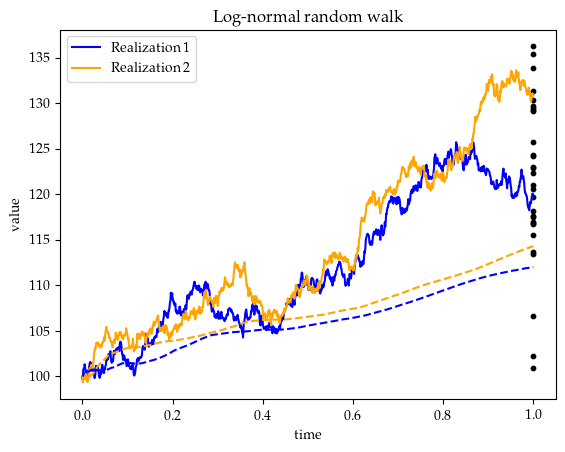

In [50]:
T = 1000 #number of time steps
ts = np.linspace(0, 1, T) #time steps
dt = ts[1] - ts[0] #time step size
sigma = 0.1 #standard deviation
drift = 0.2 #drift
N = 2 #number of realizations

#Realize log-normal random walk
B_log_0 = 100
B_log = np.zeros((N, T))
avg_log = np.zeros((N, T))
for n in range(N):
    B_log[n, 0] = B_log_0
    avg_log[n, 0] = B_log_0
    for t in range(1, T):
        B_log[n, t] = B_log[n, t-1] * (1 + drift * dt + sigma * np.random.normal(0, np.sqrt(dt)))
        avg_log[n, t] = np.mean(B_log[n, :t+1])

#Realize the solution of the log-normal random walk
B_log_sol = B_log_0 * np.exp((drift - sigma ** 2 / 2) * 1 + sigma * np.random.normal(0, 1, (30)))

plt.plot(ts, B_log[0, :], label='Realization 1', color='blue')
plt.plot(ts, B_log[1, :], label='Realization 2', color='orange')
plt.plot(ts, avg_log[0, :], color='blue', linestyle='--')
plt.plot(ts, avg_log[1, :], color='orange', linestyle='--')
#plt.plot(ts, var[0, :], color='blue', linestyle=':')
#plt.plot(ts, var[1, :], color='orange', linestyle=':')
plt.scatter(np.ones_like(B_log_sol), B_log_sol, s=10, color='black')
plt.legend()
plt.xlabel('time')
plt.ylabel('value')
plt.title('Log-normal random walk')

## Mean-reverting random walks

Mean-reverting random walks can be used to model assets that have the tendency to flow back to their mean value. One such model is given by
$$
\mathrm{d}S = (\nu - \mu S)\mathrm{d}t + \sigma \mathrm{d}X,
$$
which can be used to model short-term interest rates. If $\mu S \gg \nu$, there is an average exponential suppression of $S$ while if $\mu S \ll \nu$, there is a linear drift towards larger values of $S$. In that way, there is a balancing between up and downwards movement of the value $S(t,X)$. The model above is referred to as the Vasciek model for short-term interest and is an example of an Ornstein-Uhlenbeck process.\
\
By transforming to the variable $W = \nu/\mu - S$, satisfying
$$
\mathrm{d}W = -\mu W\mathrm{d}t+\sigma\mathrm{d}X
$$
and considering $I = \mathrm{e}^{\mu t}$, one finds
$$
\mathrm{d}(IW) = \mathrm{e}^{\mu t}\sigma\mathrm{d}X
$$
which can be integrated to
$$
W(t) = W(0)\mathrm{e}^{-\mu t}+\sigma\int_0^t\mathrm{e}^{\mu(\tau - t)}\mathrm{d}X(\tau).
$$
It is interesting here to play with the parameters of the drift and reversion rate as well as the initial value $S_0$.

Text(0.5, 1.0, 'mean-reversion random walk')

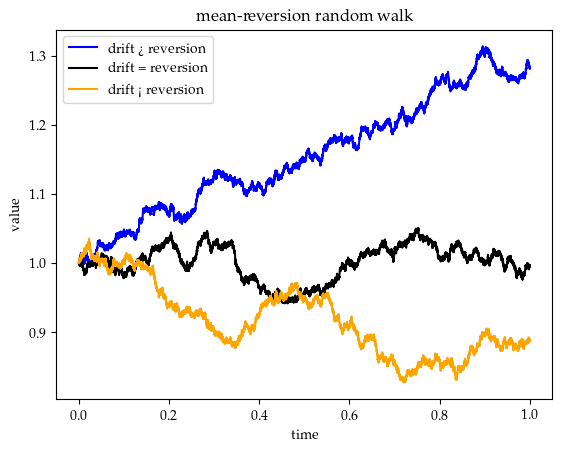

In [82]:
T = 20000 #number of time steps
ts = np.linspace(0, 1, T) #time steps
dt = ts[1] - ts[0] #time step size
sigma = 0.1 #standard deviation
drift = 0.5 #drift
reversion = 0.5 #reversion

#Realize mean-reverting random walk with different rates
param = np.array([[0.5, 0.3], [0.5, 0.5], [0.3, 0.5]])
B_mr_0 = 1
B_mr = np.zeros((3, T))
avg_mr = np.zeros((3, T))
for n in range(3):
    B_mr[n, 0] = B_mr_0
    avg_mr[n, 0] = 1
    for t in range(1, T):
        B_mr[n, t] = B_mr[n, t-1] * (1 - param[n][1] * dt) + param[n][0] * dt + sigma * np.random.normal(0, np.sqrt(dt))
        avg_mr[n, t] = np.mean(B_mr[n, :t+1])

plt.plot(ts, B_mr[0, :], label="drift > reversion", color='blue')
plt.plot(ts, B_mr[1, :], label='drift = reversion', color='black')
plt.plot(ts, B_mr[2, :], label='drift < reversion', color='orange')
#plt.plot(ts, avg_mr[0, :], color='blue', linestyle='--')
#plt.plot(ts, avg_mr[1, :], color='orange', linestyle='--')
plt.legend()
plt.xlabel('time')
plt.ylabel('value')
plt.title('mean-reversion random walk')

We can see that the system is driven on average towards $S_* = \nu / \mu$. So if $S_0 = \nu / \mu$ (black curve), then there is only a randomized movement to the right without average drift to smaller or larger values. If $S_0 < S_*$, as for the blue curve, the system undergoes a phase of increasing value until $S$ is reached on average. Reversely, if $S_0 > S_*$, the value of $S$ tends to smaller values (orange curve).

# Analytical Solutions to the Black-Scholes Model

The Black-Scholes model describes the value of a contract, $V(S,t)$ as a function of the underlying asset $S$ and time $t$. Under the assumptions of this mode, the value is governed by the Black-Scholes equation
$$
\frac{\partial V}{\partial t} + S\frac{\partial V}{\partial S}+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2} - rV = 0,
$$
where $r$ is the (fixed) interest rate and $\sigma$ the volatility. The Black-Scholes equation is basically a heat equation with an additional advection term and a decaying term. Thus, one can find an implicit solution
$$
V(S,t) = \frac{\mathrm{e}^{-r(T-t)}}{\sigma\sqrt{2\pi (T-t)}}\int_0^\infty\frac{\mathrm{d}S'}{S'}\exp\lbrace\left(\log(S/S')+(r-\sigma^2/2)(T-t)\right)/2\sigma^2 (T-t)\rbrace\mathrm{Payoff}(S').
$$
The Payoff function is the termninal or *final* condition $V(S(T),T)$ at expiry $T$. Given that, one can seek for solutions either analytically (in limited cases) and numerically (in most cases).\
\
In the following, let's consider the simple case of a European call option with terminal condition
$$
V(S,T) = \mathrm{max}(S - E,0),
$$
with $S$ the value of underlying and $E$ the strike. Defining
$$
\begin{aligned}
d_1 &= \frac{\log(S/E)+(r-D+\sigma^2/2)(T-t)}{\sigma\sqrt{T-t}},\\
d_2 &= \frac{\log(S/E)+(r-D-\sigma^2/2)(T-t)}{\sigma\sqrt{T-t}} = d_1 - \sigma\sqrt{T-t},
\end{aligned}
$$
$V(S,t)$ is given by
$$
V(S,t) = SN(d_1) - E\mathrm{e}^{-r(T-t)}N(d_2),
$$
where $N(x)$ is the cumulative Gauss distribution
$$
N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x\mathrm{d}x'\mathrm{e}^{-x'^2/2}.
$$
Let's implement!

/var/folders/1z/yf13v2xd7192y6bwwsr8_xt00000gn/T/ipykernel_46138/3419621419.py:9: RuntimeWarning: divide by zero encountered in divide
  return (np.log(S / strike) + (interest - dividend + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))


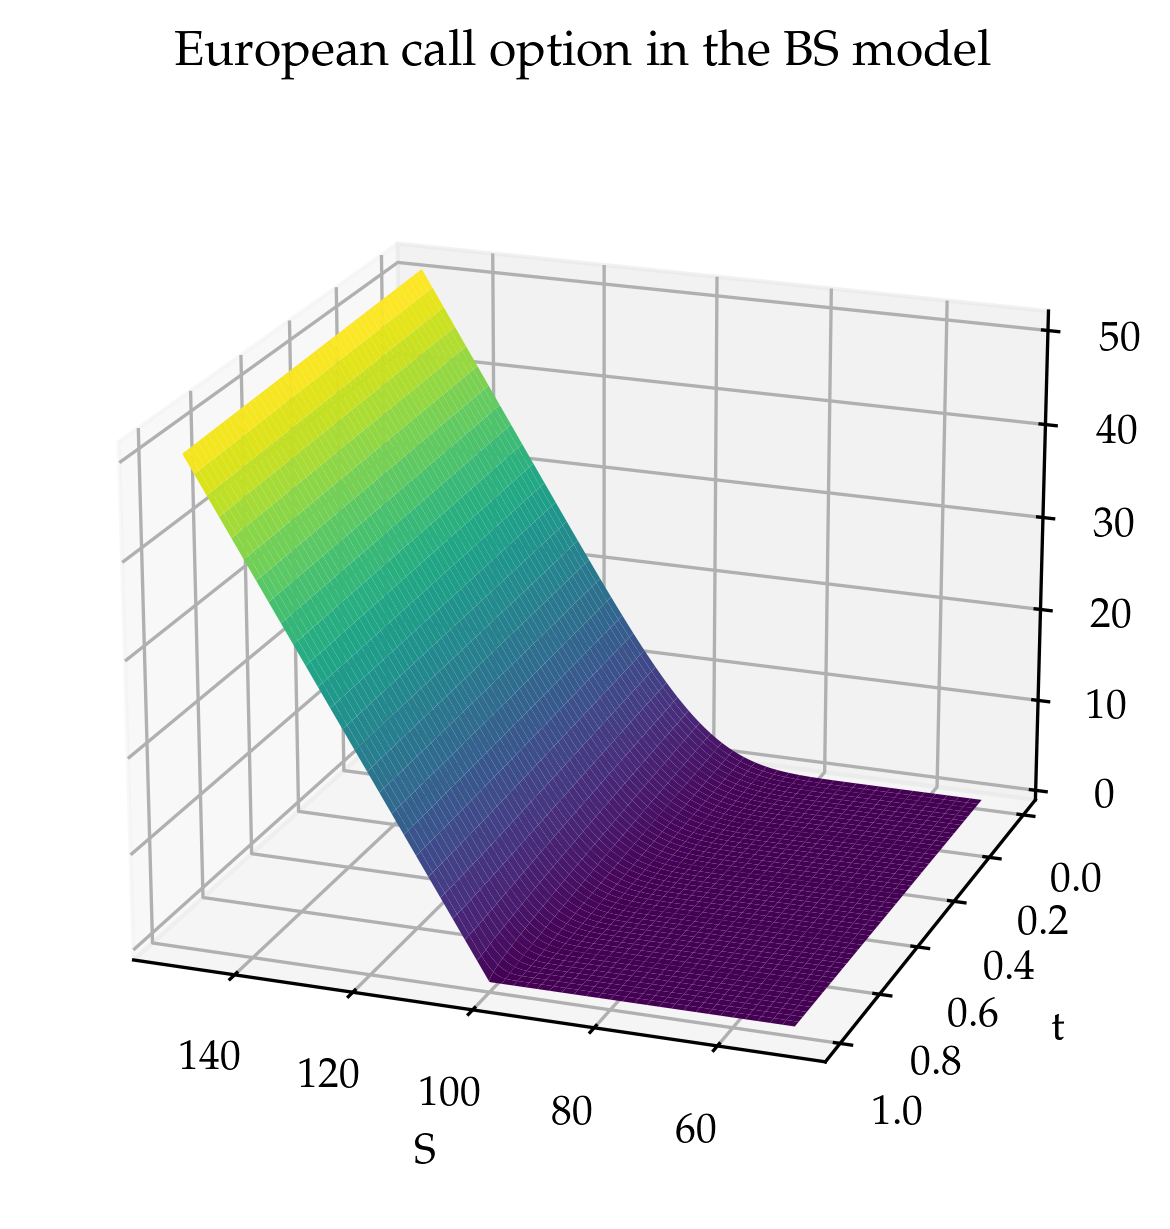

In [43]:
#Black Scholes solution for European call option
sigma = 0.1
interest = 0.01
dividend = 0.0
T = 1.0
strike = 100.0

def d1(S, strike, t, T, interest, dividend, sigma):
    return (np.log(S / strike) + (interest - dividend + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))

def d2(S, strike, t, T, interest, dividend, sigma):
    return d1(S, strike, t, T, interest, dividend, sigma) - sigma * np.sqrt(T - t)

def V(S, strike, t, T, interest, dividend, sigma):
    return S * norm.cdf(d1(S, strike, t, T, interest, dividend, sigma)) - strike * np.exp(-interest * (T - t)) * norm.cdf(d2(S, strike, t, T, interest, dividend, sigma))

S_vals = np.linspace(50, 150, 1000)
t_vals = np.linspace(0, T, 1000)
Ss, ts = np.meshgrid(S_vals, t_vals)
Vs = V(Ss, strike, ts, T, interest, dividend, sigma)
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Ss, ts, Vs, cmap='viridis')
plt.xlabel('S')
plt.ylabel('t')
plt.title('European call option in the BS model')
ax.view_init(elev = 20, azim=110)

We can see very nicely how the kink of the payoff function at expiry $T$ gets smoothed out/diffuses to a smooth curve for $t<T$.

Let's realise an underlying asset according to geometric Brownian motion and apply the BS solution to that in order to see the value of the European call option as a function of time. 

/var/folders/1z/yf13v2xd7192y6bwwsr8_xt00000gn/T/ipykernel_46138/3419621419.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.log(S / strike) + (interest - dividend + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))


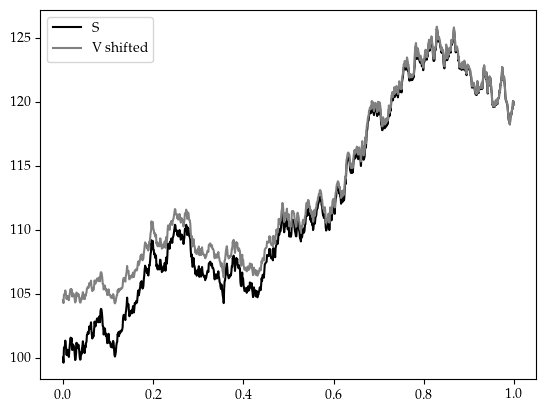

In [68]:
V_realized = [V(B_log[0][n_t], strike, t, 1.0, interest, dividend, sigma) for (n_t, t) in enumerate(ts)]
plt.plot(ts, B_log[0], label='S', color='black')
plt.plot(ts, V_realized + np.float64(100), label='V shifted', color='gray')
plt.legend()

The idea of hedging is to buy an option of an underlying and to go short on the underlying by an amount that is determined by 
$$
\Delta = \frac{\partial V}{\partial S}.
$$
In the idealized case, this eliminates all uncertainty, and the profit is then deterministic. (This confuses me a little since we do not now for instance the drift?)